# Central Limit Theorem

In this section, we are going to show you how the central limit theorem works. We'll:
* generate random samples from a population
* take the means of the samples
* visualize the resulting means

You'll see that although the population does not follow a Gaussian distribution, the resulting distribution of the sample means does look Gaussian.

To start things off, run the code cell below. This cell will run a helper function that creates the population data, then visualizes the population data and calculates the mean of the population data. There are 10,000 data points in the population. 

If you run the cell multiple times, you'll notice that the distribution changes slightly; however, the general shape remains the same.

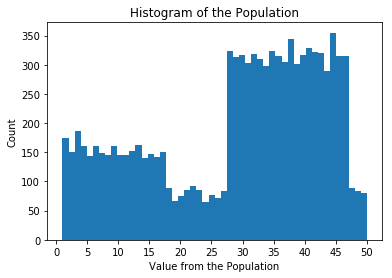

population mean  29.104


In [1]:
import helpers
import numpy as np
%matplotlib inline

population_data = helpers.distribution(50, 10000, 100)
helpers.histogram_visualization(population_data)
print('population mean ', np.mean(population_data))

# Taking Samples from the Population

The next code cell will randomly choose N data points from the population. These N data points will be called a sample. We are using the numpy library's random.choice method to randomly choose N values, which you can read about [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html).

Run the code cell below to see some example output. The code randomly draws 10 data points from the population to make a sample of size 10.

In [2]:
def random_sample(population_data, sample_size):
    return np.random.choice(population_data, size = sample_size)

random_sample(population_data, 10)

array([46, 17, 31, 33, 30, 32, 46, 28,  3,  6])

# Calculating the Sample Mean

We'll next use the numpy library to calculate the mean of each randomly generated sample. 

In [3]:
def sample_mean(sample):
    return np.mean(sample)

# take a sample from the population
example_sample = random_sample(population_data, 10)

# calculate the mean of the sample and output the results
sample_mean(example_sample)

33.100000000000001

# Central Limit Theorem Results

Now, we'll use the random_sample() function and the sample_mean() function to show how the central limit theorem works.

The code below contains a for loop that draws a random sample of size N, then takes the mean of the sample, and stores the means in a list. Each iteration of the for loop will have a different random sample. Study the code below and then run the cell.

In [4]:
###
# Code for showing how the central limit theorem works.
# The function inputs:
# population - population data
# n - sample size
# iterations - number of times to draw random samples

def central_limit_theorem(population, n, iterations):
    sample_means_results = []
    for i in range(iterations):
        # get a random sample from the population of size n
        sample = random_sample(population, n)
        
        # calculate the mean of the random sample 
        # and append the mean to the results list
        sample_means_results.append(sample_mean(sample))
    return sample_means_results

print('Means of all the samples ')
central_limit_theorem(population_data, 10, 10000)

Means of all the samples 


[20.300000000000001,
 25.899999999999999,
 25.300000000000001,
 25.399999999999999,
 24.100000000000001,
 22.699999999999999,
 30.600000000000001,
 27.699999999999999,
 34.5,
 30.100000000000001,
 27.600000000000001,
 27.899999999999999,
 35.799999999999997,
 27.199999999999999,
 28.600000000000001,
 27.199999999999999,
 20.600000000000001,
 34.299999999999997,
 23.300000000000001,
 28.699999999999999,
 31.399999999999999,
 30.800000000000001,
 33.799999999999997,
 36.5,
 32.100000000000001,
 33.299999999999997,
 32.700000000000003,
 31.699999999999999,
 29.600000000000001,
 30.800000000000001,
 27.0,
 29.199999999999999,
 29.399999999999999,
 28.800000000000001,
 15.199999999999999,
 31.699999999999999,
 38.299999999999997,
 27.300000000000001,
 32.5,
 24.199999999999999,
 22.399999999999999,
 25.800000000000001,
 23.800000000000001,
 32.200000000000003,
 26.899999999999999,
 32.200000000000003,
 30.5,
 30.5,
 35.0,
 31.100000000000001,
 35.0,
 22.100000000000001,
 26.300000000000001,

# Visualize the Results - Sample Size = 30

The next cell calculates the means of ten-thousand samples each of size 30 and then visualizes the sample means using a histogram. Notice that the results roughly have the shape of a Gaussian distribution.

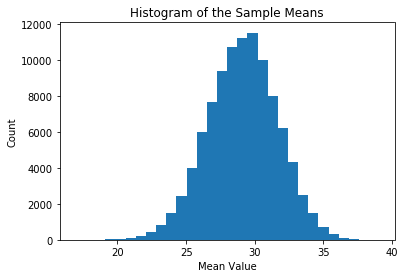

In [6]:
import matplotlib.pyplot as plt

def visualize_results(sample_means):

    plt.hist(sample_means, bins = 30)
    plt.title('Histogram of the Sample Means')
    plt.xlabel('Mean Value')
    plt.ylabel('Count')

# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 30, 10000)

# Visualize the results
visualize_results(sample_means_results)

So we started off with a population that definitely did not have a Gaussian distribution. But by taking samples of the distribution and calculating the sample means, we end up with something that looks like a Gaussian distribution.

# Visualize the Results - Sample Size = 1

One part of the central limit theorem states that the sample size needs to be large enough. A general rule of thumb is that the sample size should be greater than or equal to 30. Let's try using different sample sizes to see what the results look like.

An exagerrated case would be to use a sample size of 1. This should give us a similar distribution to the original population. Run the code below to see the results.

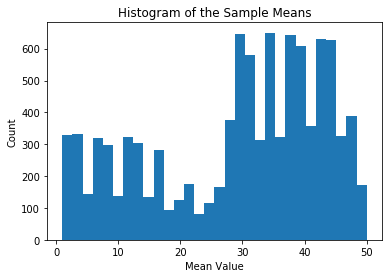

In [7]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 1, 10000)

# Visualize the results
visualize_results(sample_means_results)

# Visualize the Results - Sample Size = 10

Now, let's use the minimum recommended sample size of 30 and see what happens.


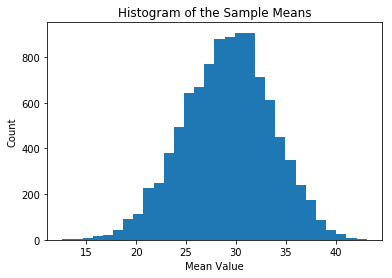

In [12]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 10, 10000)

# Visualize the results
visualize_results(sample_means_results)

With a sample size of 10, the distribution of the sample means does look somewhat Gaussian.

# Visualize the Results - Sample Size = 1000

Let's go even further and use a larger sample size: in this case 1000.


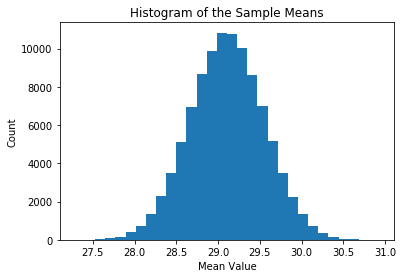

In [11]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 1000, 10000)

# Visualize the results
visualize_results(sample_means_results)

This result not only looks Gaussian, but you can see another trend. The spread of the data (ie the standard deviation) is decreasing as the sample size increases.

# Visualize the Results - Sample Size = 10000

What happens if the sample size equals the population size? Because we're taking [random samples with replacement](http://stattrek.com/statistics/dictionary.aspx?definition=Sampling_with_replacement), it's very unlikely that one of the samples would be exactly the population; however, the standard deviation should decrease even further since each sample will likely be similar to the population.

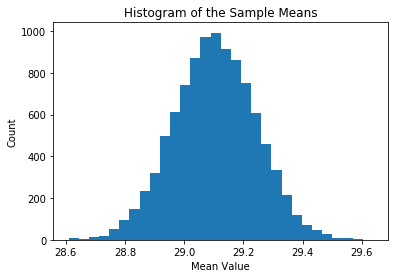

In [13]:
# Take random sample and calculate the means
sample_means_results = central_limit_theorem(population_data, 10000, 10000)

# Visualize the results
visualize_results(sample_means_results)


# Conclusion 
Notice as well that the center of these distributions is near the original population mean.

Think about collecting data in the real world. If you wanted to find the distribution of human height around the world, you could measure every single person's height and analyze the results. If you took the mean of your results, you would have the true average of human height; however, measuring the entire world population is not feasible. 

Instead, you could take a sample of heights. If you only measured thirty people, your sample means is likely to be far from the population mean. However, if you measured 2 billion randomly chosen people, the sample mean will probably be closer to the population mean. The larger your sample, the more likely your sample mean will match the true population mean.